**Names/Surnames - AEM**: Prodromos Polychroniads - 9, Lampros Karavidas - 4

# Introduction #

Paper used: **"Using Data Mining to Predict Secondary School Student Performance"** by Paulo Cortez and Alice Silva

Datasets used: *student-mat.csv, student-por.csv*

The **Problem**: In Portugal, it is observed that there are high student failure rates compared to other European countries. The lack of success in the core classes of Mathematics and the Portuguese language is extremely serious. The paper approaches students in *secondary education*. Real-world data are used gathered by using school reports and questionnaires.

Four DM models were used in the paper:
* Decision Trees
* Random Forest
* Neural Networks
* Support Vector Machines

**Results** of the paper: A good predictive accuracy can be achieved provided that the first (**G1**) and/or second (**G2**) school period grades are available. Other **relevant** features: number of absences, parent's job and education. 

In the end, only the DT/RF algorithms were considered, because it was more easy to extract knowledge from these models.

### Our Analysis ###

In order to produce our own results we used four models. Those are:

* **Linear (Multiple) Regression**: The objective of our linear regression model is to find a relationship between one or more features and the final students' grades (**G3**).
* **Decision Tree**: The DT algorithm is a supervised learning model used in predicting a dependent variable (**G3** - pass/fail) with a series of training variables. This algorithm was used for classification.
* **Logistic Regression (Binary)**: It is a statistical method for predicting classes. The target variable (**G3**) has only two possible outcomes, pass or fail.
* **Logistic Regression (Ordinal)**: The target variable has three or more ordinal categories which will be explained below.

The conclusions and results of our analysis will be discussed later in the notebook.

## Initialization ##

In this first step, we import all the required libraries and modules. More specifically, we used numpy, pandas, sklearn, seaborn and matplotlib.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df = pd.read_csv('student-mat.csv', delimiter = ';') # reading the student-mat dataset
#df = pd.read_csv('student-por.csv', delimiter = ';') # reading the student-por dataset

## Linear Regression ##

We implemented and ran the Linear Regression algorithm using various combinations of the major features of the datasets as they were described in the original paper. By the term *major*, we are referring to the features that have the biggest impact on predicting our target variable. These are also the features that the authors considered more in their analysis.

Those features are:
* G1 = first period grade (numeric: 0 - 20)
* G2 = second period grade (numberic: 0 - 20)
* absences = number of school absences (numeric: 0 - 93)
* failures = number of past class failures (numeric: n if 1 <= n <3, else 4)
* age = students' age (numeric: from 15 to 22)

In [547]:
feature_cols = ['G1']
#feature_cols = ['G2']
#feature_cols = ['G1','G2']
#feature_cols = ['G2', 'absences']
#feature_cols = ['failures', 'age']
#feature_cols = ['G1','G2','absences']
#feature_cols = ['G1','G2','absences','failures','age']
X = df[feature_cols]
y = df['G3']

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X,y) #By default, the test_size is 25% and train_size is 75%

In [549]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [550]:
print(linreg.intercept_) #The expected mean value of y when all X =0
k = zip(feature_cols, linreg.coef_) #The direction of the relationship between the predictor variables 
                                   #and the target variable
print(tuple(k))

-1.2857047844965486
(('G1', 1.074754525482794),)


In [551]:
y_pred = linreg.predict(X_test)

We used **RMSE** (Root Mean Square Error) as our statistical metric. RMSE is the standard deviation of the residuals (prediction erros) and it tells you how concentrated the data is around the line of best fit. Lower values of RMSE indicate better fit.

It is the most popular metric, as the result is square rooted to make it more interpretable as it’s in base units. We found it to be the recommended metric to be used in order to interpret our model.

In [552]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE calculation

2.7792609960669807


## Decision Tree ##

We implemented and ran the Decision Tree algorithm using, once again, various combinations of the features the authors used in their Decision Trees as shown in their Figure 4. The trees shown, there, are considered the best by them and the rules extracted involve only the features that we used below.

Those features are:

   * G1 = first period grade (numeric: 0 - 20)
   * G2 = second period grade (numberic: 0 - 20)
   * absences = number of school absences (numeric: 0 - 93)
   * mjob = mother's job (nominal)
   * goout = going out with friends (numberic: 1 (very low) - 5 (very high))

In [247]:
df2 = pd.read_csv('student-mat.csv', delimiter = ';')
#df2 = pd.read_csv('student-por.csv', delimiter = ';')

The nominal variable (**mjob**) was transformed into a 1-of-C encoding, in order to permit the use of the DT algorithm. More specifically, the following changes were made to its values:

* at_home - 0
* teacher - 1
* services (civil services in paper) - 2
* health (health care related in paper) - 3
* other - 4

In addition to the above transformation, we transformed the values of our target variable (**G3**), in order to achieve the binary classification, as given:

* 0 <= value <= 9: transformed to 0 (fail - the student failed the class)
* 10 <= value <= 20: transformed to 1 (pass - the student passed the class)

In [248]:
df21 = df2.replace({'Mjob': {'at_home': 0, 'teacher': 1, 'services': 2, 'health': 3, 'other': 4}})
df22 = df21.replace({'G3': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}})
df22 = df22.replace({'G3': {10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1}})

In [249]:
feature_cols_2 = ['G1','G2','absences','Mjob','goout']
#feature_cols_2 = ['G1','G2','Mjob']
#feature_cols_2 = ['G2']
X2 = df22[feature_cols_2]
y2 = df22['G3']

In [250]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)

In [251]:
clf = DecisionTreeClassifier() #nodes are expanded until all leaves are pure or until all leaves contain less than 2 samples
#clf = DecisionTreeClassifier(max_depth = 4) #the maximum depth of the tree is 4 (depth of the trees in the paper)
clf = clf.fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)

In [252]:
print("Accuracy: ", metrics.accuracy_score(y2_test, y2_pred)) #accuracy of the DT algorithm

Accuracy:  0.8888888888888888


In [253]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

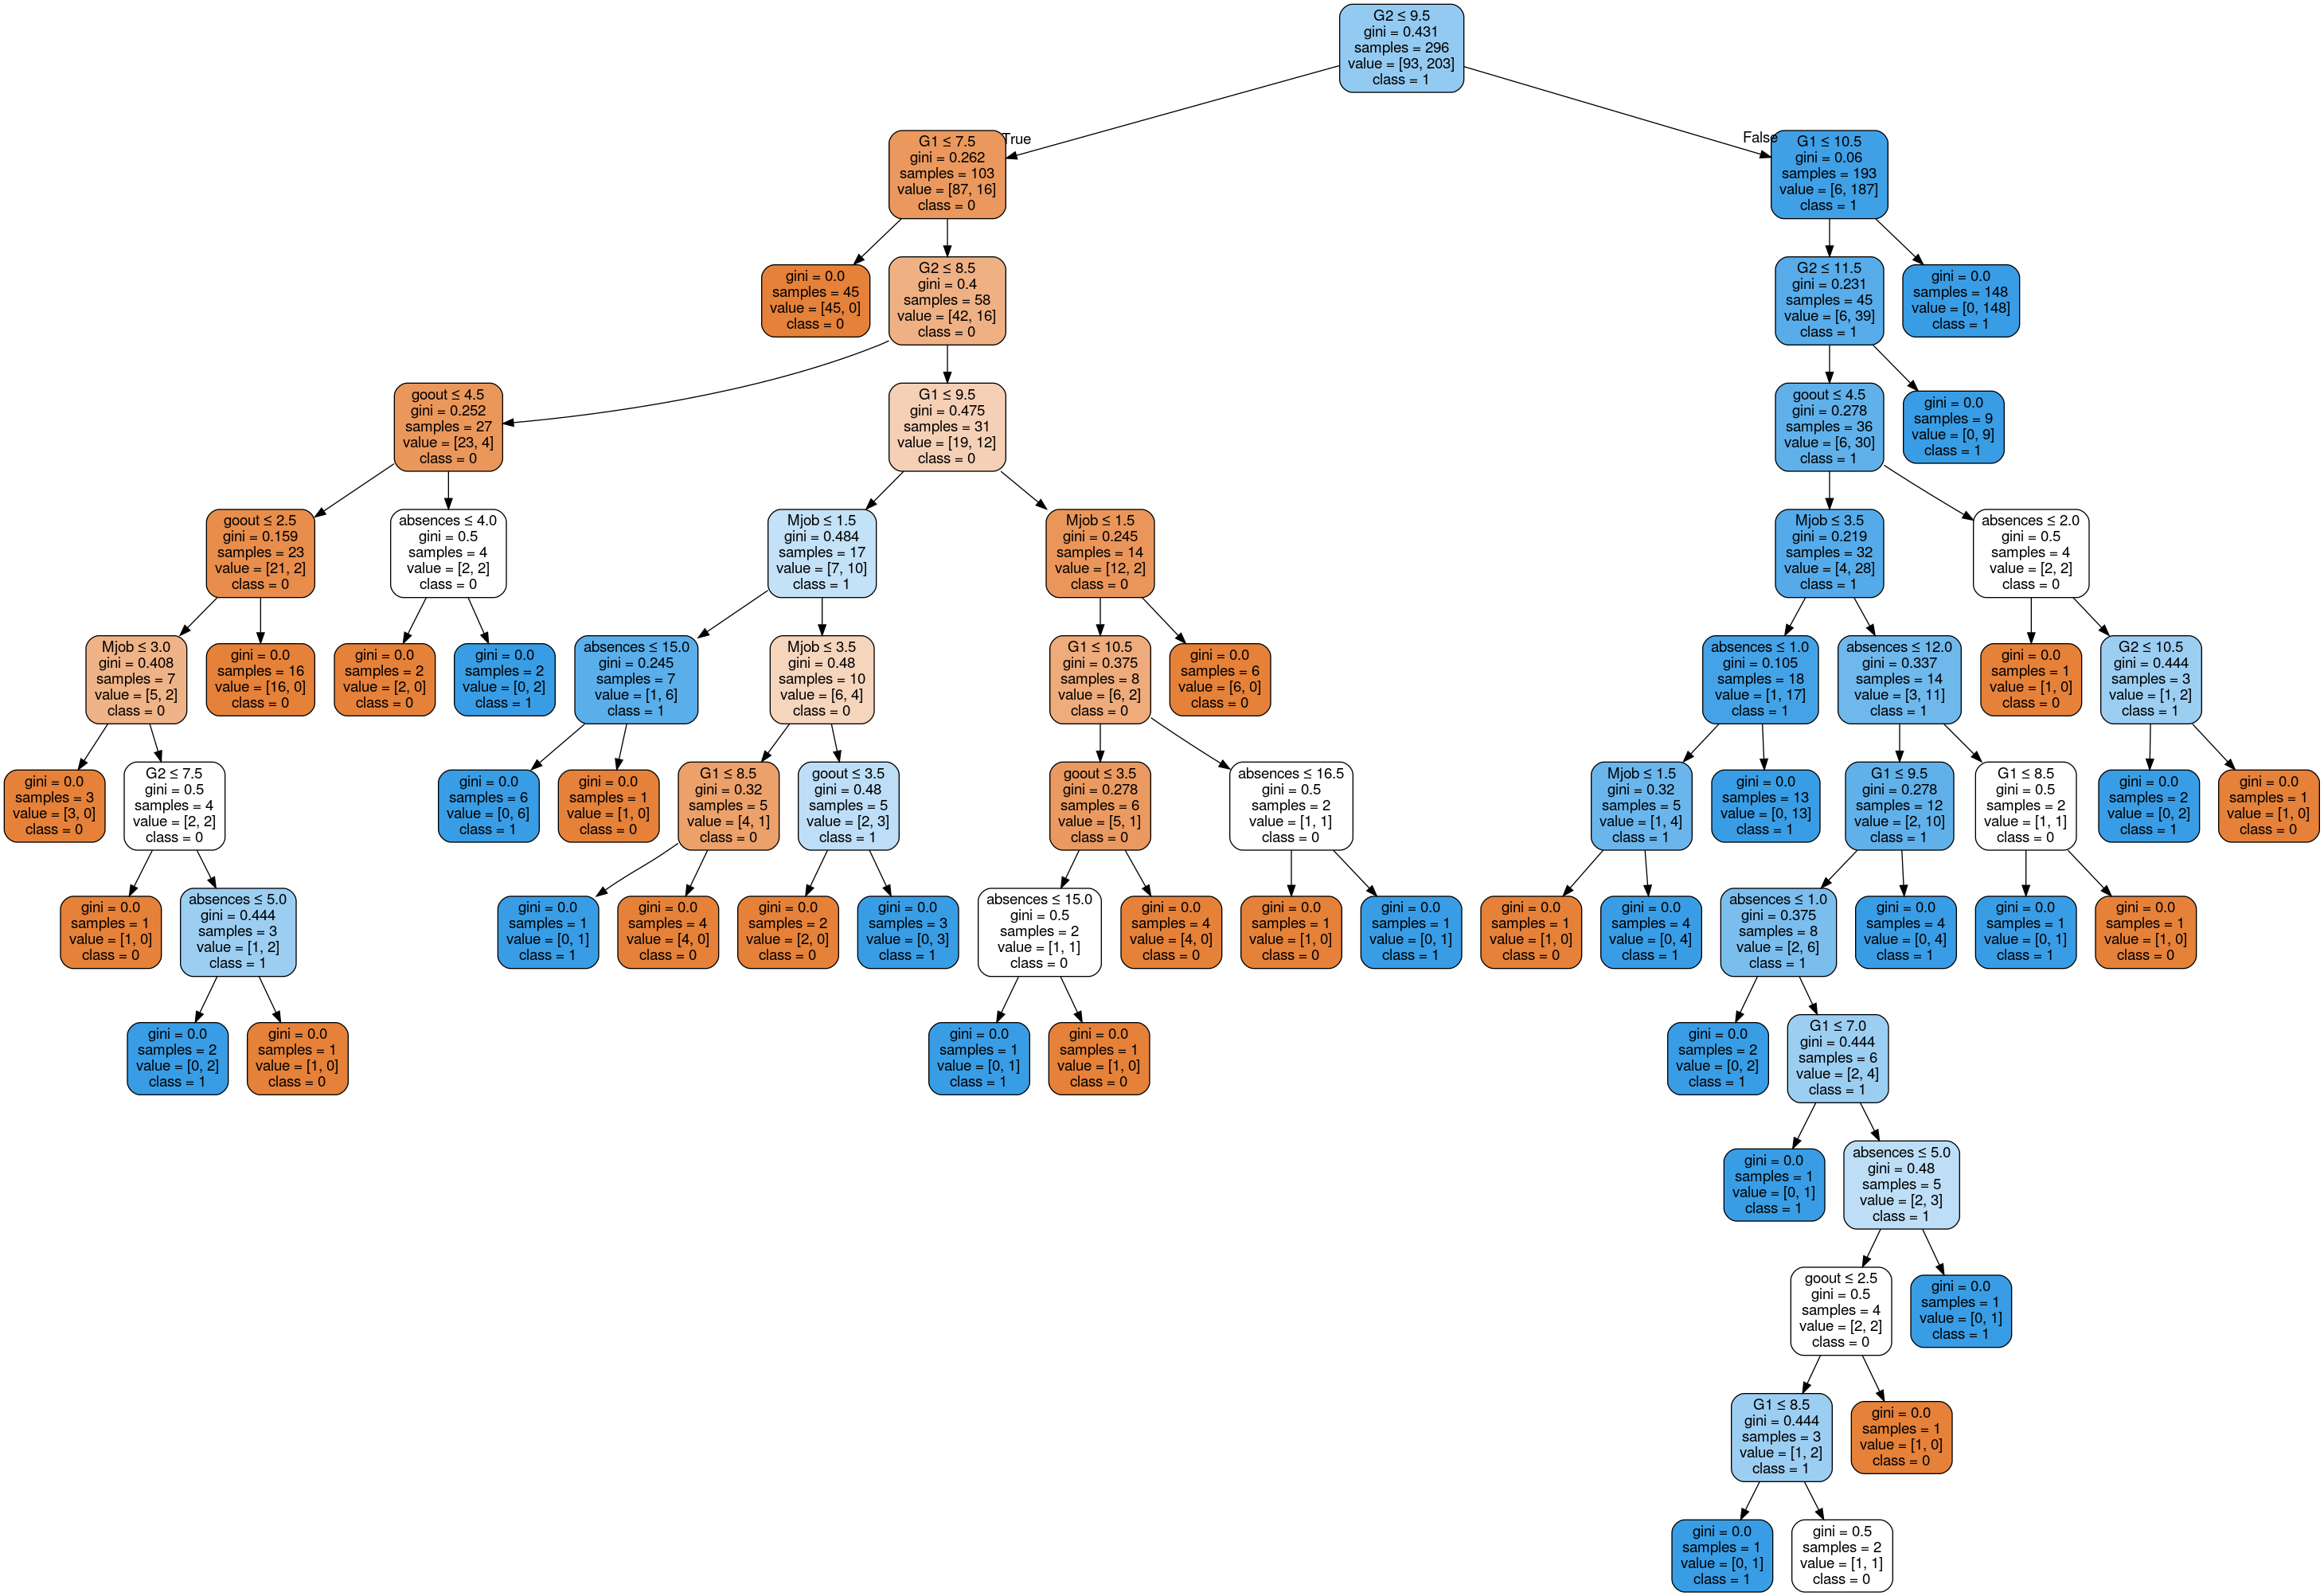

In [254]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True,
               feature_names = feature_cols_2, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("results.png")
Image(graph.create_png())

## Logistic Regression (Binary) ##

We implemented and ran the Logistic Regression algorithm in its *Binary Classification* form using combinations of the features we used above in our DT algorithm.

For this algorithm we used two different combinations. In the first one we included all the major features together, like we did for the Decision Trees and for our second combination we used only the **G2** variable (second period grade) because we found it to be a great predictor by itself.


In [53]:
df3 = pd.read_csv('student-mat.csv', delimiter = ';')
#df3 = pd.read_csv('student-por.csv', delimiter = ';')

Again, the transformations below were conducted for the same reasons as before. We want two classes, 0 (fail) and 1 (pass), for the binary classification.

In [54]:
df31 = df3.replace({'Mjob': {'at_home': 0, 'teacher': 1, 'services': 2, 'health': 3, 'other': 4}})
df32 = df31.replace({'G3': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}})
df32 = df32.replace({'G3': {10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1}})

In [55]:
feature_cols_3 = ['G1','G2','absences','Mjob','goout']
#feature_cols_3 = ['G2']
X3 = df32[feature_cols_3]
y3 = df32['G3']

In [56]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3)

In [57]:
logreg = LogisticRegression(solver='lbfgs') #the solver selected is suitable for multiclass problems like ours
logreg.fit(X3_train, y3_train)

y3_pred = logreg.predict(X3_test)

We use the confusion matrix, which is a table that is used to describe the performance of our classification model.

In [58]:
cnf_matrix = metrics.confusion_matrix(y3_test, y3_pred)
cnf_matrix

array([[28,  5],
       [ 6, 60]])

Text(0.5, 257.44, 'Predicted label')

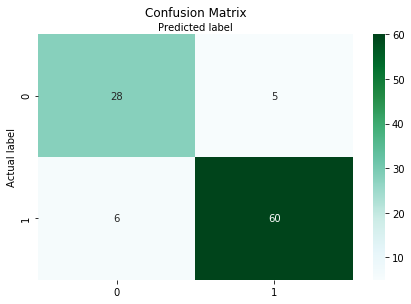

In [59]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "BuGn", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Logistic Regression (Ordinal) ##

We implemented and ran the Logistic Regression algorithm in its *Ordinal Classification* form using the same features and combinations as the ones we used in its binary classification form.


In [125]:
df4 = pd.read_csv('student-mat.csv', delimiter = ';')
#df4 = pd.read_csv('student-por.csv', delimiter = ';')

In order to achieve the ordinal classification, we needed to transform **G3** values to 5 different classes, as recommended by the authors of the paper. More specifically, the transformations we made are the ones below:

* 0 - 9: transformed to 0 (fail)
* 10 - 11: transformed to 1 (sufficient)
* 12 - 13: transformed to 2 (satisfactory)
* 14 - 15: transformed to 3 (good)
* 16 - 20: transformed to 4 (excellent / very good)

In [126]:
df41 = df4.replace({'Mjob': {'at_home': 0, 'teacher': 1, 'services': 2, 'health': 3, 'other': 4}})
df42 = df41.replace({'G3': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}})
df42 = df42.replace({'G3': {10: 1, 11: 1, 12: 2, 13: 2, 14: 3, 15: 3, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4}})

In [127]:
feature_cols_4 = ['G1','G2','absences','Mjob','goout']
#feature_cols_4 = ['G2']
X4 = df42[feature_cols_4]
y4 = df42['G3']

In [128]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4)

In [129]:
logreg2 = LogisticRegression(solver='lbfgs')
logreg2.fit(X4_train, y4_train)

y4_pred = logreg2.predict(X4_test)

In [130]:
cnf_matrix2 = metrics.confusion_matrix(y4_test, y4_pred)
cnf_matrix2

array([[24,  0,  0,  0,  0],
       [ 4, 22,  3,  0,  0],
       [ 0, 10,  5,  3,  0],
       [ 0,  2,  3, 11,  0],
       [ 0,  0,  0,  2, 10]])

Text(0.5, 257.44, 'Predicted label')

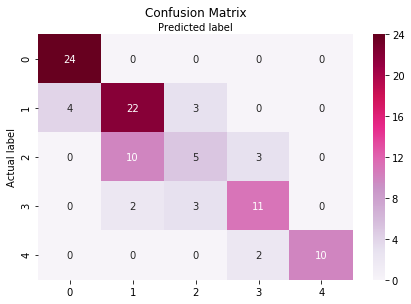

In [131]:
class_names2 = [0, 1, 2, 3, 4]
fig2, ax2 = plt.subplots()
tick_marks2 = np.arange(len(class_names2))
plt.xticks(tick_marks2, class_names2)
plt.yticks(tick_marks2, class_names2)

sns.heatmap(pd.DataFrame(cnf_matrix2), annot = True, cmap = "PuRd", fmt = 'g')
ax2.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Conclusions #

Here we will present the conclusions and the results of the algorithms described above in the notebook. 



**Linear Regression Results**

Five tests were conducted for each of the feature combinations. Those combinations are: {G2}, {G1}, {G1,G2}, {G2, absences}, {failures, age}, {G1, G2, absences}, {G1, G2, absences, failures, age}.

Based on the results of these tests, we calculated a mean RMSE value for each one of the combinations. The top 3 predictor combinations based on this mean value are:

*student-mat.csv dataset*

* **{G1, G2, absences}**: Mean => 1,762 (Top)
* **{G1, G2, absences, failures, age}**: Mean => 1,884
* **{G2}**: Mean => 1,886

The best score achieved in any of the tests conducted was **1,52** for the {G2} value combination alone, whereas the worst score was for the {failures, age} combination with the value of **4,55**.

*student-por.csv dataset*

* **{G2}**: Mean => 1,204 (Top)
* **{G2, absences}**: Mean => 1,22
* **{G1, G2, absences, failures, age}**: Mean => 1,232

The best score achieved in any of the tests conducted was **0,87** for the {G2} value combination alone, whereas the worst score was for the {failures, age} combination with the value of **3,23**.



**Decision Tree Results**

For the Decision Tree algorithm our metric was the accuracy of the predictors. We ran two tests for each combination, one with the default max_depth and one with max_depth = 4. The combinations we used are: {G2}, {G1, G2, mjob}, {G1, G2, mjob, absences, goout}.

The accuracy level of the predictor combinations are:

*student-mat.csv dataset*

* **{G2}**: None => 90%, 4-depth => 96% (Top)
* **{G1, G2, mjob}**: None => 93%, 4-depth => 93%
* **{G1, G2, mjob, absences, goout}**:  None => 87%, 4-depth => 87%

*student-por.csv dataset*

* **{G2}**: None => 94% (Top), 4-depth => 91%
* **{G1, G2, mjob}**: None => 94% (Top), 4-depth => 93%
* **{G1, G2, mjob, absences, goout}**:  None => 87%, 4-depth => 93%



**Logistic Regression (Binary)**

For the Logistic Regression algorithm in its *Binary* form we calculated the confusion matrices as stated above for the following combinations of predictors: {G2}, {G1, G2, absences, mjob, goout}. From these matrices we calculated the algorithm's accuracy, which is essentially, how often the classifier is correct. The resulting accuracies of the predictors are:

*student-mat.csv dataset*

* **{G2}**: Accuracy => 93,9%
* **{G1, G2, absences, mjob, goout}**: Accuracy => 93,9%

*student-por.csv dataset*

* **{G2}**: Accuracy => 93,8%
* **{G1, G2, absences, mjob, goout}**: Accuracy => 92,6%


**Logistic Regression (Ordinal)**

For the Logistic Regression algorithm in its *Ordinal* form we calculated the confusion matrices as stated above for the same combinations of predictors as in the previous section. From these matrices we calculated the algorithm's accuracy. The resulting accuracies of the predictors are:

*student-mat.csv dataset*

* **{G2}**: Accuracy => 65,6%
* **{G1, G2, absences, mjob, goout}**: Accuracy => 66,7%

*student-por.csv dataset*

* **{G2}**: Accuracy => 68,7%
* **{G1, G2, absences, mjob, goout}**: Accuracy => 62,5%


**Our conclusions**

From our linear regression algorithm, we understand that *G1* and *G2* are very important for a correct prediction of *G3*, confirming the authors' statement about those features. From both datasets we see that the combination of *age* with *failures* is the worst predictor combination, while *G2* sufficies in order to have a pretty accurate prediction of *G3*. The latter is of our own analysis and does not derive from the paper.

From our decision tree algorithm, we see that the combination *G1*, *G2* and *mjob* is the best predictor combination of the ones mentioned in the paper for both classes (Mathematics and Portuguese language). However, we noticed that once again *G2* provides us with predictions with the same or even, sometimes, higher accuracy, confirming our previous observation for the linear regression.

From our logistic regression algorithms we notice that the *binary* form is **much more** accurate than the *ordinal* one. Of course, that can be explained by the fact that it is more difficult to predict a value based on 5 classes instead of only two (pass/fail). As for the accuracy values of these algorithms we see that they are very close to each other based on the dataset and combinations used.

All in all, we confirm the findings of the paper with the use of our own results and add that the *G2* feature, more or less, can always be a very successful predictor for the final grade *G3*.

**Note**: The features selected to be used for the predictor combinations in all of our algorithms are correspondent to the ones selected by the authors on their original paper, except from some combinations of our own making.